In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"F:\DSA\Assignments\Data\titanic_dataset .csv")

In [3]:
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. **PREPROCESSING**

In [6]:
data.drop('Cabin', axis = 1, inplace = True) #Information already available from Pclass

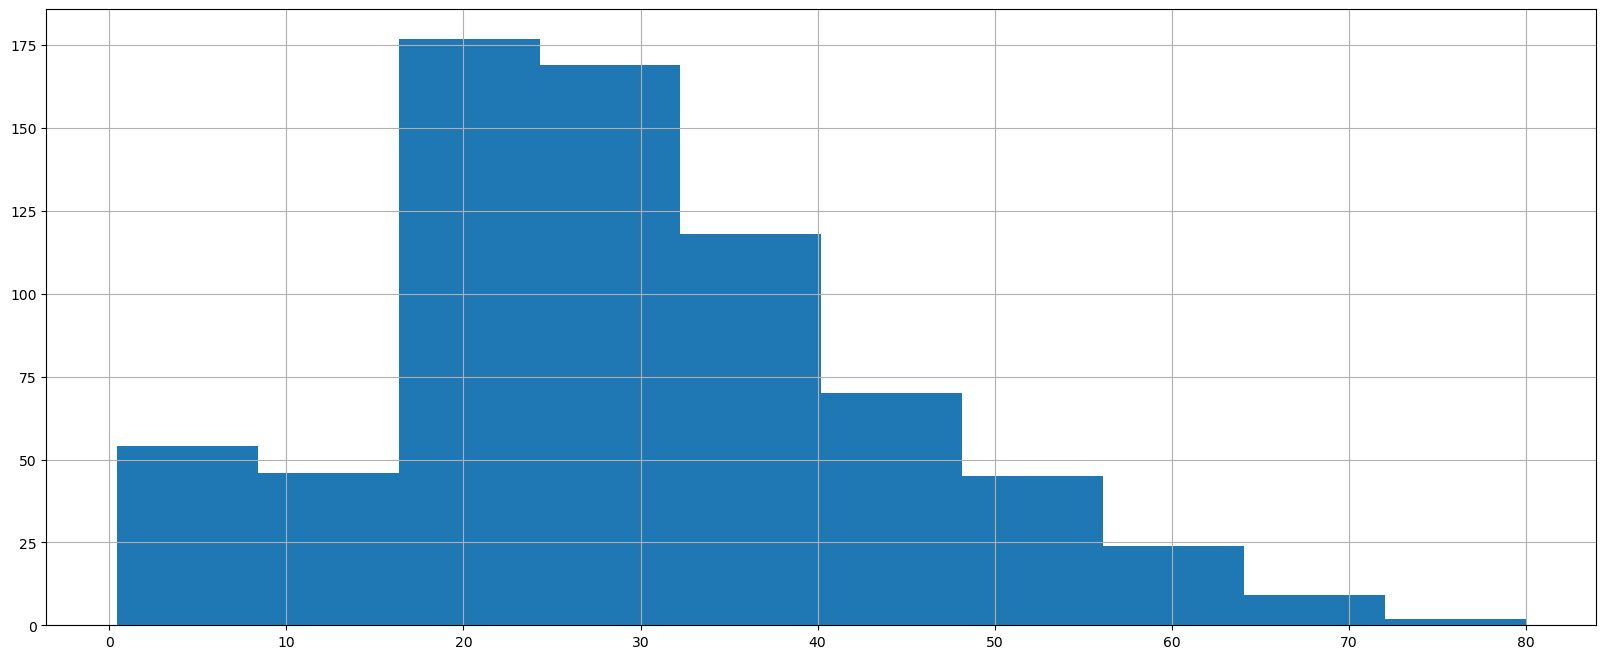

In [7]:
data['Age'].hist(figsize = (20,8))
plt.show()

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].median()) #Hist is right skewed

In [9]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


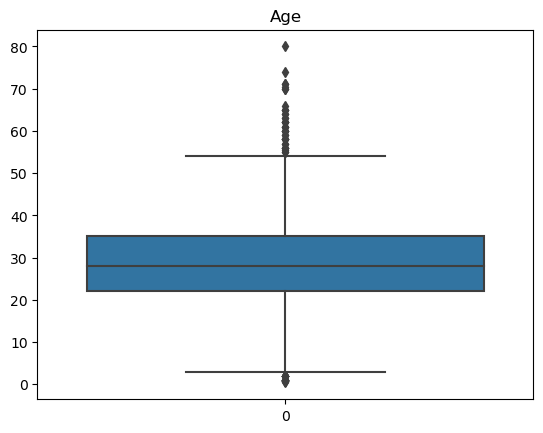

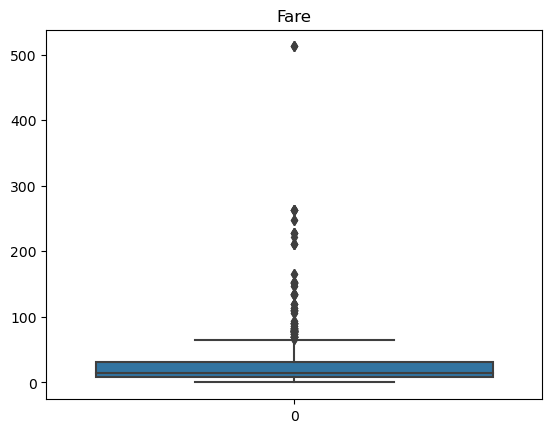

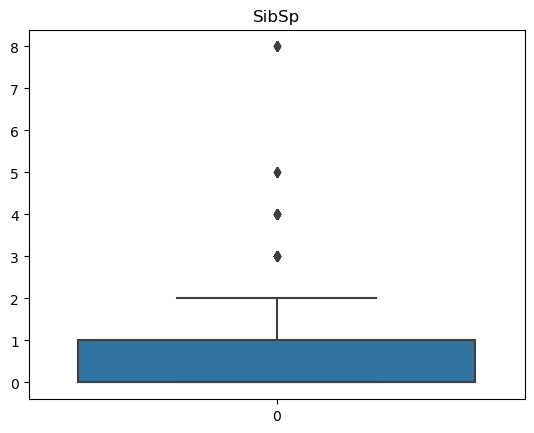

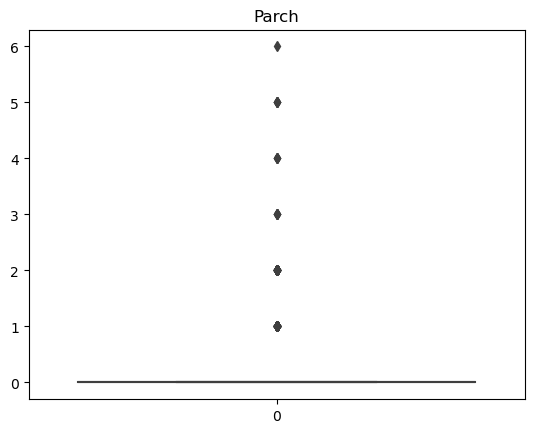

In [11]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for i in num_cols:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [12]:
def iqr_clipping(data, columns):
    data_new = data.copy() 
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        data_new[col] = data_new[col].clip(lower=low_lim, upper=up_lim)
    return data_new

columns = num_cols
data = iqr_clipping(data, columns)

In [13]:
import sklearn.preprocessing as sk
le = sk.LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked']) #Encoding feature columns

2. **EXPLORATORY DATA ANALYSIS**

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,2


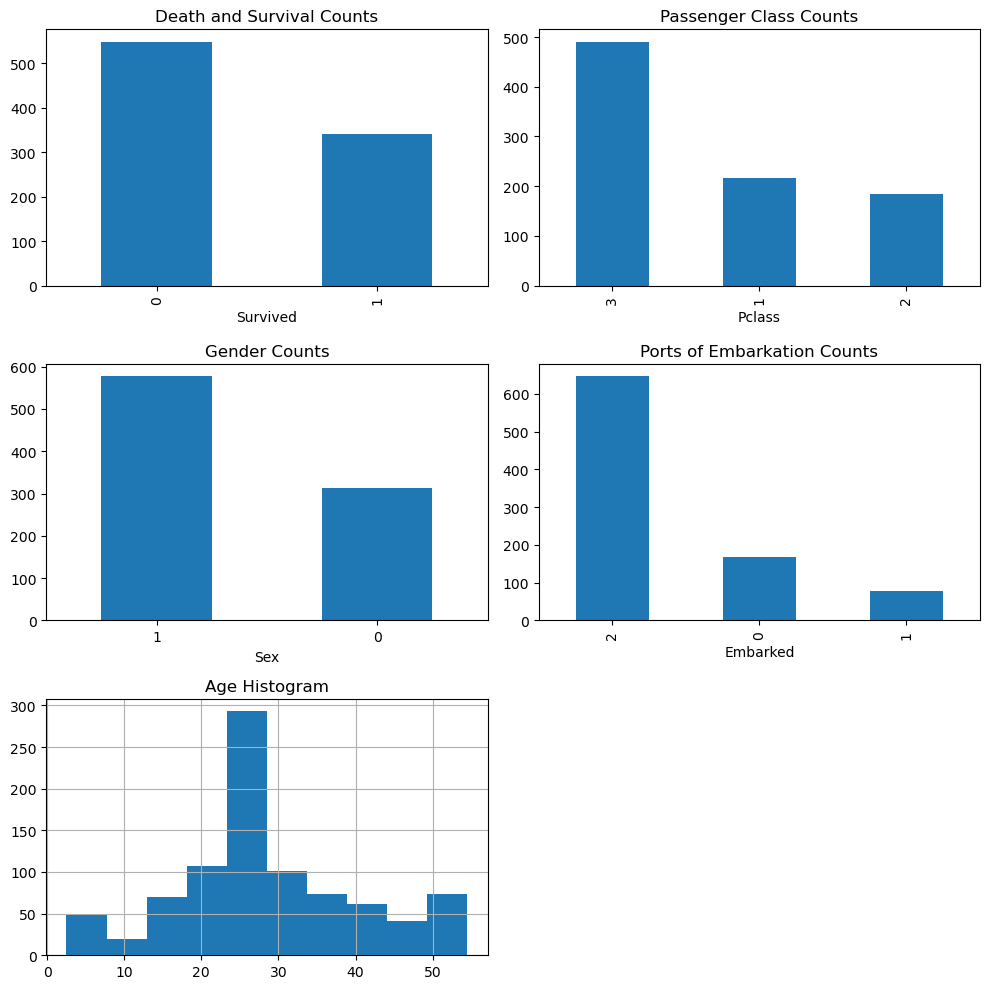

In [15]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)

# Death and Survival counts
plt.subplot2grid(fig_dims, (0, 0))
data['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts')

# Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
data['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Counts')

#Gender counts
plt.subplot2grid(fig_dims, (1, 0))
data['Sex'].value_counts().plot(kind='bar', title='Gender Counts')
plt.xticks(rotation=0)

#Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
data['Embarked'].value_counts().plot(kind='bar',title='Ports of Embarkation Counts')

#Age histogram
plt.subplot2grid(fig_dims, (2, 0))
data['Age'].hist()
plt.title('Age Histogram')

plt.tight_layout()
plt.show()

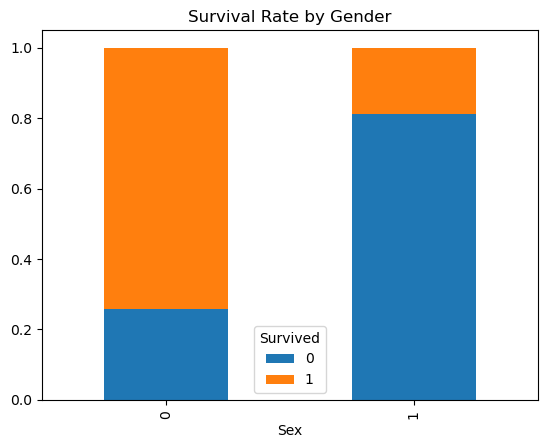

In [16]:
#Relationship between Gender and Survivability

gender_tab = pd.crosstab(data['Sex'], data['Survived'])
gender_tab = gender_tab.div(gender_tab.sum(1).astype(float), axis=0)
gender_tab.plot(kind='bar', stacked=True, title='Survival Rate by Gender')
plt.show()

In [17]:
passenger_classes = sorted(data['Pclass'].unique())

for p_class in passenger_classes:
    print ('M: ', p_class, len(data[(data['Sex'] == 0) & (data['Pclass'] == p_class)]))
    print ('F: ', p_class, len(data[(data['Sex'] == 1) & (data['Pclass'] == p_class)]))

M:  1 94
F:  1 122
M:  2 76
F:  2 108
M:  3 144
F:  3 347


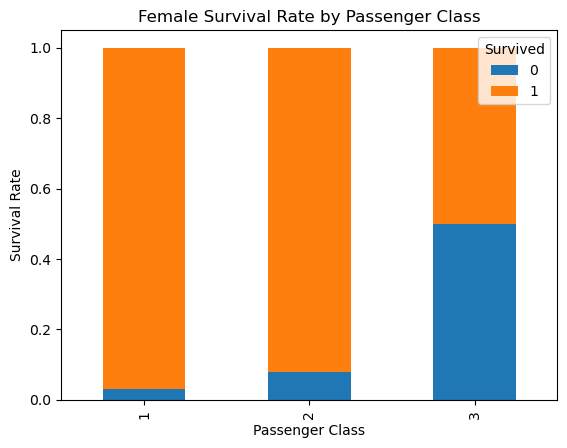

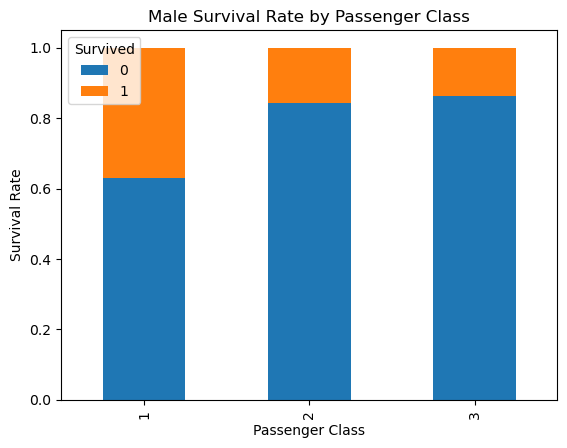

In [18]:
female_data = data[data['Sex'] == 0]
females_surv = pd.crosstab(female_data['Pclass'], data['Survived'])
females_surv_pct = females_surv.div(females_surv.sum(1).astype(float), axis=0)
females_surv_pct.plot(kind='bar', stacked=True, title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

male_data = data[data['Sex'] == 1] 
males_surv = pd.crosstab(male_data['Pclass'], data['Survived'])
males_surv_pct = males_surv.div(males_surv.sum(1).astype(float), axis=0)
males_surv_pct.plot(kind='bar', stacked=True, title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

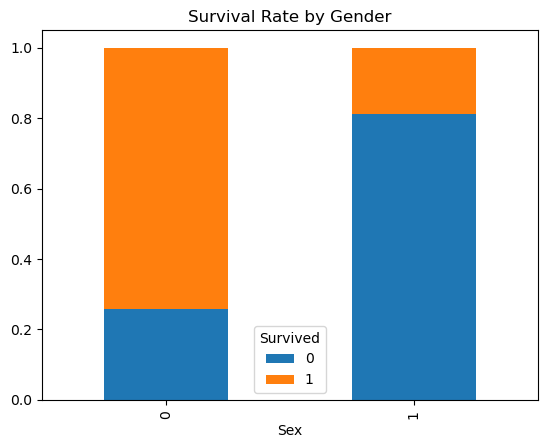

In [19]:
gender_data = pd.crosstab(data['Sex'], data['Survived'])
gender_data_surv = gender_data.div(gender_data.sum(1).astype(float), axis=0)
gender_data_surv.plot(kind='bar', stacked=True, title='Survival Rate by Gender')
plt.show()

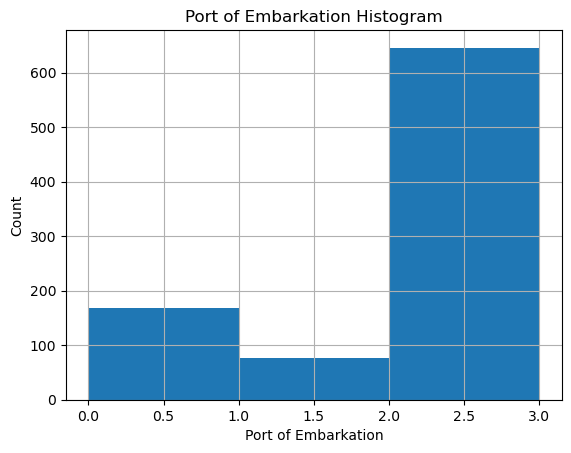

In [20]:
#Embarkment

data['Embarked'].hist(bins= 3, range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

# C = 1, Q = 2, S = 3

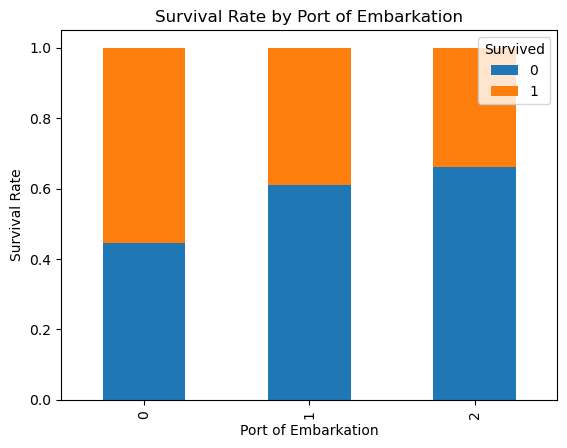

In [21]:
embarked_data = pd.crosstab(data['Embarked'], data['Survived'])
embarked_data_surv= embarked_data.div(embarked_data.sum(1).astype(float), axis=0)
embarked_data_surv.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

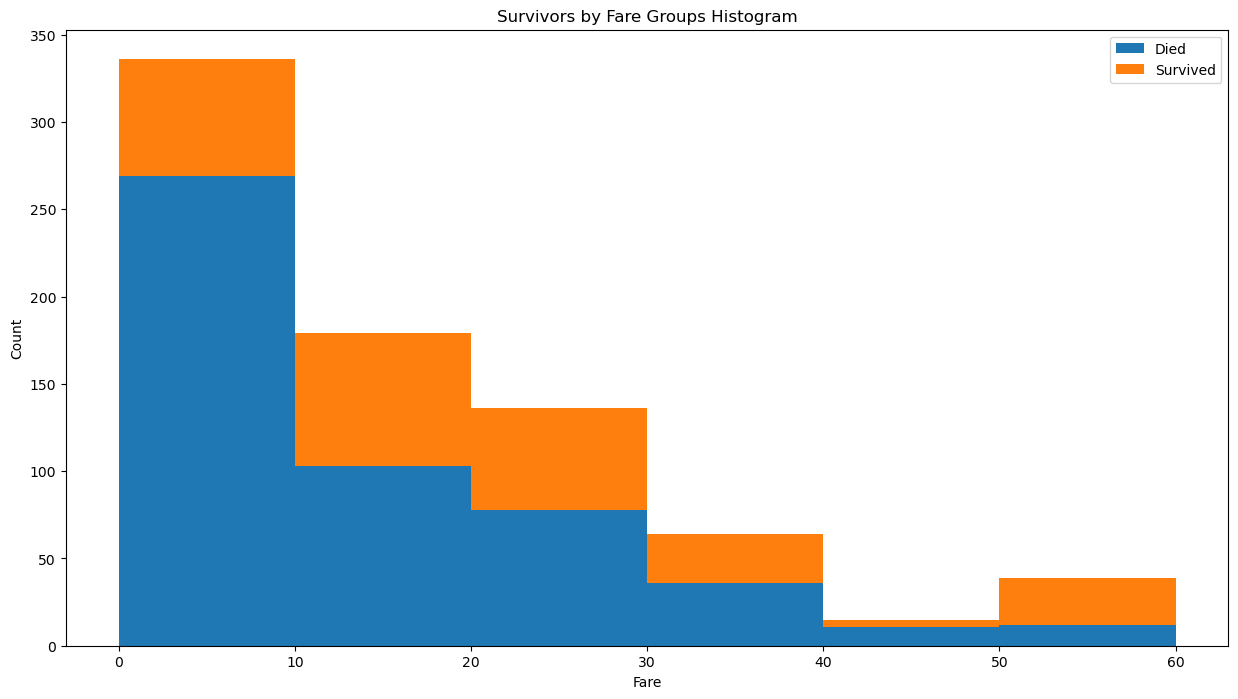

In [22]:
fig, axes = plt.subplots(1,1,figsize=(15,8))
df1 = data[data['Survived'] == 0]['Fare']
df2 = data[data['Survived'] == 1]['Fare']
axes.hist([df1, df2], bins=range(0,70,10), stacked=True, label=('Died', 'Survived'))
axes.legend(loc='best')
axes.set_title('Survivors by Fare Groups Histogram')
axes.set_xlabel('Fare')
axes.set_ylabel('Count')
plt.show()

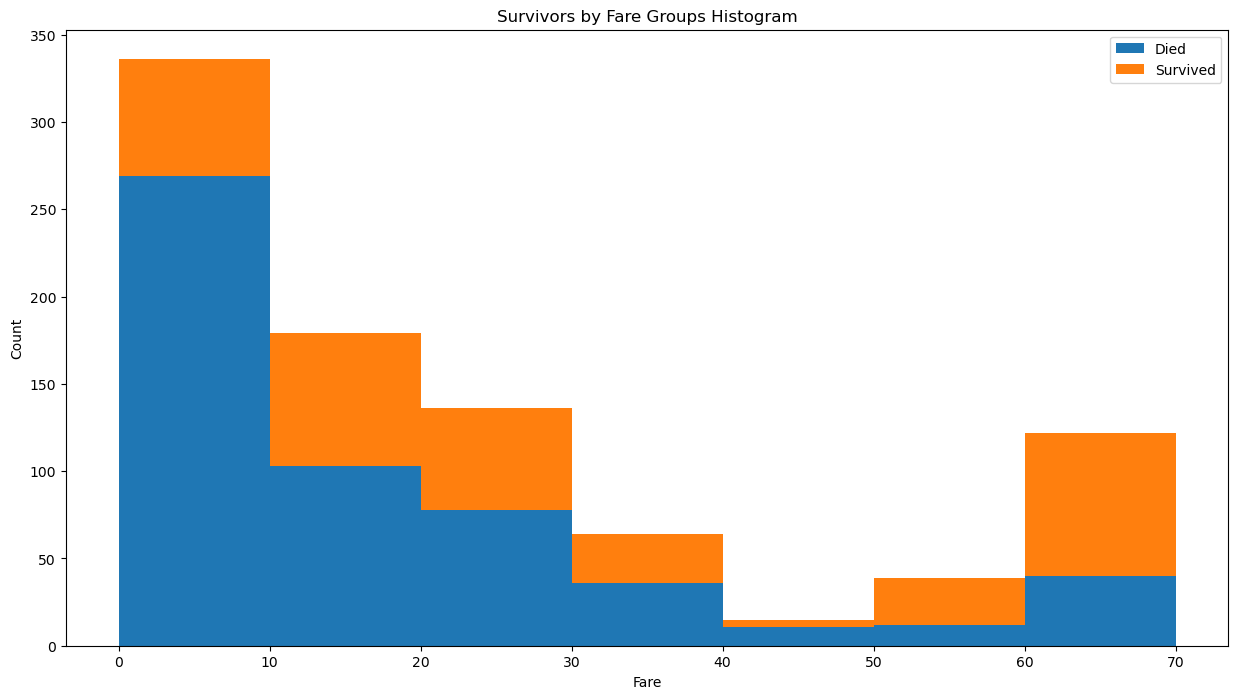

In [23]:
max_fare = data['Fare'].max()
bins = np.arange(0, max_fare + 10, 10)
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
df1 = data[data['Survived'] == 0]['Fare']
df2 = data[data['Survived'] == 1]['Fare']
axes.hist([df1, df2], bins=bins, stacked=True, label=('Died', 'Survived'))
axes.legend(loc='best')
axes.set_title('Survivors by Fare Groups Histogram')
axes.set_xlabel('Fare')
axes.set_ylabel('Count')
plt.show()

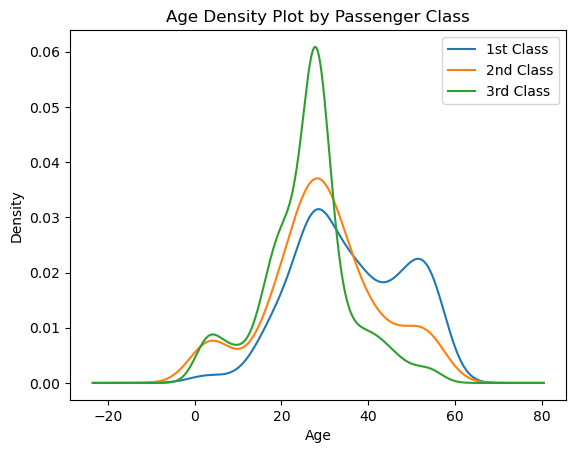

In [24]:
for pclass in passenger_classes:
    data[data['Pclass'] == pclass]['Age'].plot(kind='kde')

plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

In [25]:
data['Family'] = data['SibSp'] + data['Parch'] #Feature engineering new column

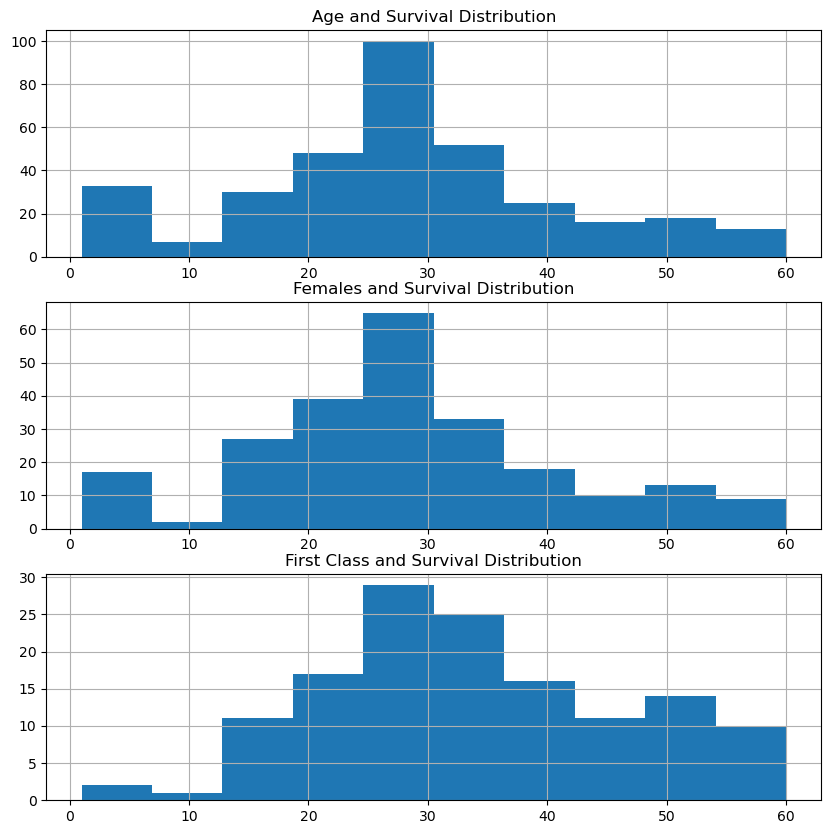

In [26]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 1)

plt.subplot2grid(fig_dims, (0, 0))
survived_df = data[data['Survived'] == 1]
survived_df['Age'].hist(bins=10, range=(1, 60))
plt.title('Age and Survival Distribution')

plt.subplot2grid(fig_dims, (1, 0))
females_df = data[(data['Sex'] == 0) & (data['Survived'] == 1)]
females_df['Age'].hist(bins=10, range=(1, 60))
plt.title('Females and Survival Distribution')

plt.subplot2grid(fig_dims, (2, 0))
class1_df = data[(data['Pclass'] == 1) & (data['Survived'] == 1)]
class1_df['Age'].hist(bins=10, range=(1, 60))
plt.title('First Class and Survival Distribution')

plt.show()

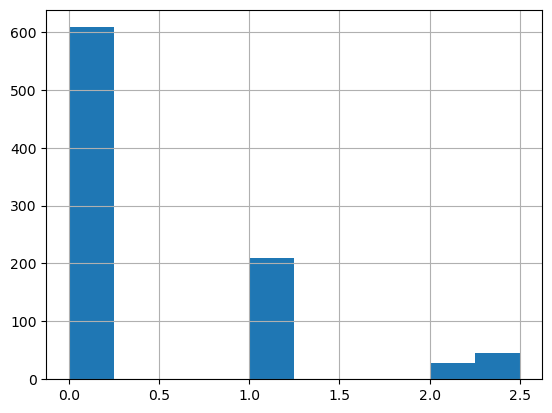

In [27]:
data['Family'].hist()
plt.show()

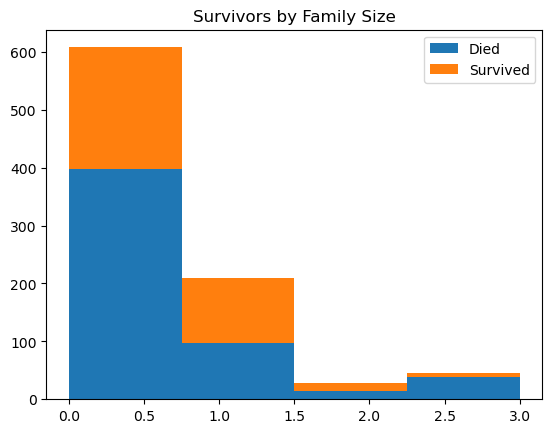

In [28]:
family_sizes = sorted(data['Family'].unique())
family_size_max = max(family_sizes)

df1 = data[data['Survived'] == 0]['Family']
df2 = data[data['Survived'] == 1]['Family']
plt.hist([df1, df2], bins=4, range=(0, 3), stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')
plt.show()

3. **MODELING BASED ON EDA**

In [29]:
#Data splitting for training and testing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

x = data[['Pclass', 'Sex', 'Age', 'Family', 'Embarked']]
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

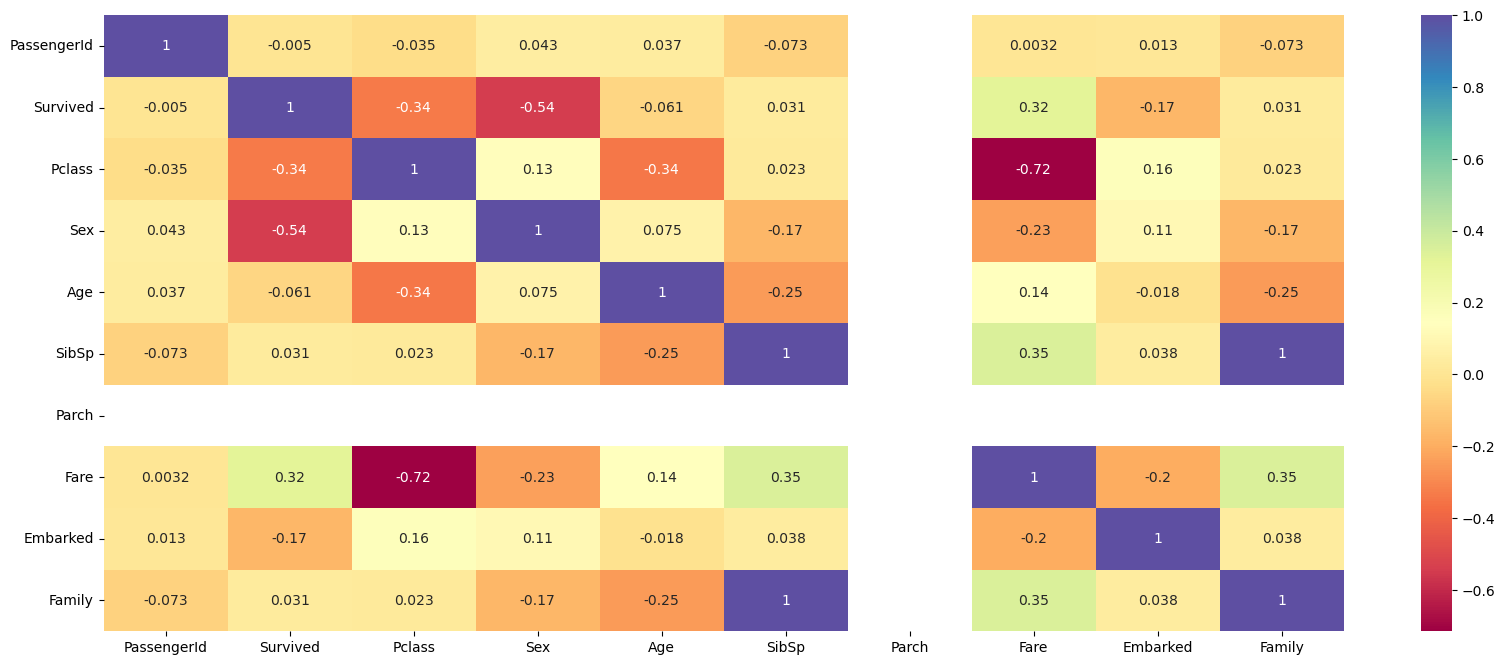

In [30]:
num_data = data.select_dtypes(include = ['int32', 'int64', 'float64'])
plt.subplots(figsize = (20,8))
sns.heatmap(num_data.corr(), annot = True, cmap = 'Spectral')
plt.show()

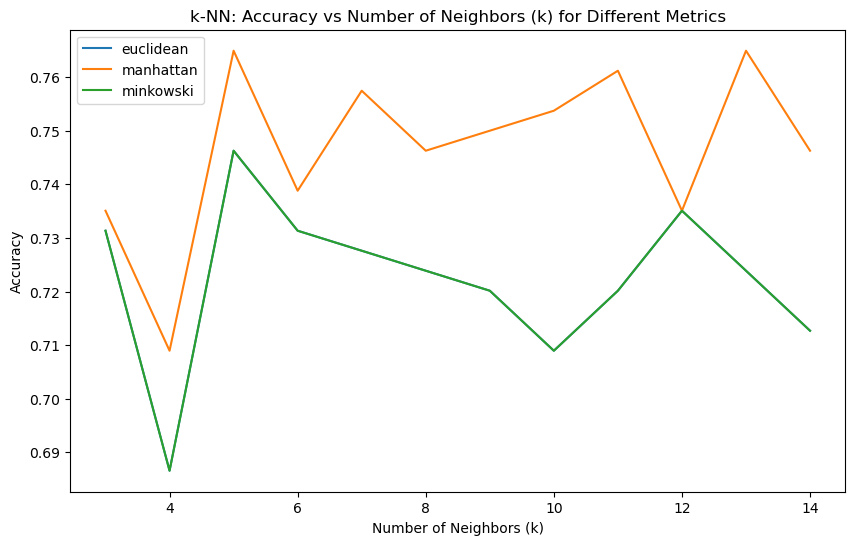

In [31]:
#k-NN Modelling

from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(3, 15)
metrics = ['euclidean', 'manhattan', 'minkowski']
metric_k = {metric: [] for metric in metrics}

for metric in metrics:
    for k in neighbors:
        classifier = KNeighborsClassifier(n_neighbors=k, metric=metric, p=2)
        classifier.fit(x_train, y_train)
        y_pred_knn = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred_knn)
        metric_k[metric].append(accuracy)

plt.figure(figsize=(10, 6))
for metric, accuracies in metric_k.items():
    plt.plot(neighbors, accuracies, label=metric)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("k-NN: Accuracy vs Number of Neighbors (k) for Different Metrics")
plt.legend()
plt.show()

In [32]:
for metric, accuracies in metric_k.items():
    print(f"\nMetric: {metric}, \nAccuracies: {accuracies}")


Metric: euclidean, 
Accuracies: [0.7313432835820896, 0.6865671641791045, 0.746268656716418, 0.7313432835820896, 0.7276119402985075, 0.7238805970149254, 0.7201492537313433, 0.7089552238805971, 0.7201492537313433, 0.7350746268656716, 0.7238805970149254, 0.7126865671641791]

Metric: manhattan, 
Accuracies: [0.7350746268656716, 0.7089552238805971, 0.7649253731343284, 0.7388059701492538, 0.7574626865671642, 0.746268656716418, 0.75, 0.753731343283582, 0.7611940298507462, 0.7350746268656716, 0.7649253731343284, 0.746268656716418]

Metric: minkowski, 
Accuracies: [0.7313432835820896, 0.6865671641791045, 0.746268656716418, 0.7313432835820896, 0.7276119402985075, 0.7238805970149254, 0.7201492537313433, 0.7089552238805971, 0.7201492537313433, 0.7350746268656716, 0.7238805970149254, 0.7126865671641791]


**MANHATTAN has the highest accuracy. MINKOWSKI and EUCLIDEAN k-NN has the same accuracy array**

In [33]:
knn_clf = KNeighborsClassifier(n_neighbors = 13, metric = 'manhattan', p = 2) #Initialising best k-NN Model

In [34]:
#SVM Modelling

from sklearn.svm import SVC
kernels = ['linear', 'rbf']
for value in kernels:
    sv_cl = SVC(kernel= value)
    sv_cl.fit(x_train, y_train)
    y_pred_svc = sv_cl.predict(x_test)
    print(f"\nKernel : { value }")
    print("Accuracy:", accuracy_score(y_test, y_pred_svc))
    print(confusion_matrix(y_test, y_pred_svc))


Kernel : linear
Accuracy: 0.7910447761194029
[[134  23]
 [ 33  78]]

Kernel : rbf
Accuracy: 0.5970149253731343
[[153   4]
 [104   7]]


In [35]:
svc_clf = SVC(kernel='linear')

In [36]:
#Cross Validation of model using KFold and Stratified KFold for SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#KFold Cross Validation
print(f"Model: SVC ")
kfold_validator = KFold(n_splits=10, shuffle=True, random_state=42)
cv_score_kf = cross_val_score(svc_clf, x, y, cv=kfold_validator)
print(f"KFold CV Scores:\n{cv_score_kf}")
print(f"KFold Mean Accuracy: {cv_score_kf.mean()}")
print(f"KFold Standard Deviation of Accuracy: {cv_score_kf.std()}\n")

# Stratified KFold cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score_skf = cross_val_score(svc_clf, x, y, cv=stratified_cv, n_jobs = -1)
print(f"Stratified KFold CV Scores:\n{cv_score_skf}")
print(f"Stratified KFold Mean Accuracy: {cv_score_skf.mean()}")
print(f"Stratified KFold Standard Deviation of Accuracy: {cv_score_skf.std()}\n")

Model: SVC 
KFold CV Scores:
[0.81111111 0.75280899 0.80898876 0.71910112 0.85393258 0.83146067
 0.73033708 0.74157303 0.75280899 0.86516854]
KFold Mean Accuracy: 0.7867290886392009
KFold Standard Deviation of Accuracy: 0.05084659699070821

Stratified KFold CV Scores:
[0.83333333 0.74157303 0.78651685 0.76404494 0.76404494 0.80898876
 0.75280899 0.7752809  0.82022472 0.82022472]
Stratified KFold Mean Accuracy: 0.7867041198501872
Stratified KFold Standard Deviation of Accuracy: 0.030432296126998624



In [37]:
#Cross Validation of model using KFold and Stratified KFold for k-NN

#KFold Cross Validation
print(f"Model: k-NN ")
kfold_validator = KFold(n_splits=10, shuffle=True, random_state=42)
cv_score_kf = cross_val_score(knn_clf, x, y, cv=kfold_validator)
print(f"KFold CV Scores:\n{cv_score_kf}")
print(f"KFold Mean Accuracy: {cv_score_kf.mean()}")
print(f"KFold Standard Deviation of Accuracy: {cv_score_kf.std()}\n")

# Stratified KFold Cross Validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score_skf = cross_val_score(knn_clf, x, y, cv=stratified_cv, n_jobs = -1)
print(f"Stratified KFold CV Scores:\n{cv_score_skf}")
print(f"Stratified KFold Mean Accuracy: {cv_score_skf.mean()}")
print(f"Stratified KFold Standard Deviation of Accuracy: {cv_score_skf.std()}\n")

Model: k-NN 
KFold CV Scores:
[0.82222222 0.78651685 0.73033708 0.7752809  0.82022472 0.86516854
 0.7752809  0.83146067 0.75280899 0.85393258]
KFold Mean Accuracy: 0.8013233458177279
KFold Standard Deviation of Accuracy: 0.04185040915549843

Stratified KFold CV Scores:
[0.85555556 0.78651685 0.83146067 0.83146067 0.74157303 0.79775281
 0.82022472 0.7752809  0.78651685 0.76404494]
Stratified KFold Mean Accuracy: 0.7990387016229712
Stratified KFold Standard Deviation of Accuracy: 0.03339448584050387



**k-NN yields the best result with an accuracy of 0.801**

In [38]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

In [39]:
predictions = knn_clf.predict(x_test)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       157
           1       0.89      0.50      0.64       111

    accuracy                           0.76       268
   macro avg       0.81      0.73      0.73       268
weighted avg       0.79      0.76      0.75       268



** *Additional Classifying* **

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_reg = LogisticRegression(random_state = 42)

In [43]:
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [44]:
log_reg.score(x_test, y_test)

0.8022388059701493

In [45]:
#KFold Cross Validation
print(f"Model: Logistic Regression ")
kfold_validator = KFold(n_splits=10, shuffle=True, random_state=42)
cv_score_kf = cross_val_score(log_reg, x, y, cv=kfold_validator)
print(f"KFold CV Scores:\n{cv_score_kf}")
print(f"KFold Mean Accuracy: {cv_score_kf.mean()}")
print(f"KFold Standard Deviation of Accuracy: {cv_score_kf.std()}\n")

# Stratified KFold cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score_skf = cross_val_score(log_reg, x, y, cv=stratified_cv, n_jobs = -1)
print(f"Stratified KFold CV Scores:\n{cv_score_skf}")
print(f"Stratified KFold Mean Accuracy: {cv_score_skf.mean()}")
print(f"Stratified KFold Standard Deviation of Accuracy: {cv_score_skf.std()}\n")

Model: Logistic Regression 
KFold CV Scores:
[0.83333333 0.76404494 0.79775281 0.7752809  0.78651685 0.85393258
 0.7752809  0.74157303 0.73033708 0.83146067]
KFold Mean Accuracy: 0.7889513108614232
KFold Standard Deviation of Accuracy: 0.038415082377298404

Stratified KFold CV Scores:
[0.81111111 0.75280899 0.76404494 0.82022472 0.75280899 0.82022472
 0.75280899 0.79775281 0.83146067 0.79775281]
Stratified KFold Mean Accuracy: 0.7900998751560548
Stratified KFold Standard Deviation of Accuracy: 0.029891512238302824



**THE ACCURACY OBTAINED WITH CURRENT FEATURES SEEMS TO BE SATURATED BETWEEN 0.79 AND 0.81 WITHOUT SCALING*

In [46]:
2. #Applying the model on scaled data

scaler = sk.StandardScaler()

In [47]:
x_train_scaled = scaler.fit_transform(x_train)
x_scaled = scaler.fit_transform(x)
x_test_scaled = scaler.fit_transform(x_test) 

In [48]:
svc_clf.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [49]:
#Cross Validation of model using KFold and Stratified KFold for k-NN

#KFold Cross Validation
print(f"Model: SVC ")
kfold_validator = KFold(n_splits=10, shuffle=True, random_state=42)
cv_score_kf = cross_val_score(svc_clf, x_scaled, y, cv=kfold_validator)
print(f"KFold CV Scores:\n{cv_score_kf}")
print(f"KFold Mean Accuracy: {cv_score_kf.mean()}")
print(f"KFold Standard Deviation of Accuracy: {cv_score_kf.std()}\n")

# Stratified KFold Cross Validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score_skf = cross_val_score(svc_clf, x_scaled, y, cv=stratified_cv, n_jobs = -1)
print(f"Stratified KFold CV Scores:\n{cv_score_skf}")
print(f"Stratified KFold Mean Accuracy: {cv_score_skf.mean()}")
print(f"Stratified KFold Standard Deviation of Accuracy: {cv_score_skf.std()}\n")

Model: SVC 
KFold CV Scores:
[0.81111111 0.75280899 0.80898876 0.71910112 0.85393258 0.83146067
 0.73033708 0.74157303 0.75280899 0.86516854]
KFold Mean Accuracy: 0.7867290886392009
KFold Standard Deviation of Accuracy: 0.05084659699070821

Stratified KFold CV Scores:
[0.83333333 0.74157303 0.78651685 0.76404494 0.76404494 0.80898876
 0.75280899 0.7752809  0.82022472 0.82022472]
Stratified KFold Mean Accuracy: 0.7867041198501872
Stratified KFold Standard Deviation of Accuracy: 0.030432296126998624



In [50]:
knn_clf.fit(x_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

In [51]:
knn_clf.score(x_test_scaled, y_test)

0.7985074626865671

In [52]:
#Cross Validation of model using KFold and Stratified KFold for k-NN

#KFold Cross Validation
print(f"Model: k-NN ")
kfold_validator = KFold(n_splits=10, shuffle=True, random_state=42)
cv_score_kf = cross_val_score(knn_clf, x_scaled, y, cv=kfold_validator)
print(f"KFold CV Scores:\n{cv_score_kf}")
print(f"KFold Mean Accuracy: {cv_score_kf.mean()}")
print(f"KFold Standard Deviation of Accuracy: {cv_score_kf.std()}\n")

# Stratified KFold Cross Validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score_skf = cross_val_score(knn_clf, x_scaled, y, cv=stratified_cv, n_jobs = -1)
print(f"Stratified KFold CV Scores:\n{cv_score_skf}")
print(f"Stratified KFold Mean Accuracy: {cv_score_skf.mean()}")
print(f"Stratified KFold Standard Deviation of Accuracy: {cv_score_skf.std()}\n")

Model: k-NN 
KFold CV Scores:
[0.83333333 0.7752809  0.83146067 0.79775281 0.85393258 0.88764045
 0.78651685 0.7752809  0.76404494 0.8988764 ]
KFold Mean Accuracy: 0.8204119850187265
KFold Standard Deviation of Accuracy: 0.04582814449210341

Stratified KFold CV Scores:
[0.87777778 0.79775281 0.78651685 0.80898876 0.78651685 0.82022472
 0.7752809  0.83146067 0.85393258 0.82022472]
Stratified KFold Mean Accuracy: 0.8158676654182273
Stratified KFold Standard Deviation of Accuracy: 0.030510003294464072



**THE MODEL k-NN HAS 0.8204 ACCURACY AND BETTER THAN SVM MODEL**

In [53]:
predictions = knn_clf.predict(x_test_scaled)

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.81      0.68      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

